In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('OnlineRetail.csv', encoding='ISO-8859-1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [13]:
df.InvoiceDate.max()

Timestamp('2011-12-09 12:50:00')

In [10]:
current_date = df['InvoiceDate'].max() + pd.DateOffset(1)

In [11]:
current_date

Timestamp('2011-12-10 12:50:00')

In [23]:
maxdate = df.groupby(["CustomerID"]).max()[['InvoiceDate']]
maxdate

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:17:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00
...,...
18280.0,2011-03-07 09:52:00
18281.0,2011-06-12 10:53:00
18282.0,2011-12-02 11:43:00


In [25]:
maxdate['Days'] = (current_date - maxdate['InvoiceDate']).dt.days
maxdate

,InvoiceDate,Days
CustomerID,,
12346.0,2011-01-18 10:17:00,326
12347.0,2011-12-07 15:52:00,2
12348.0,2011-09-25 13:13:00,75
12349.0,2011-11-21 09:51:00,19
12350.0,2011-02-02 16:01:00,310
...,...,...
18280.0,2011-03-07 09:52:00,278
18281.0,2011-06-12 10:53:00,181
18282.0,2011-12-02 11:43:00,8


In [26]:
recency = maxdate.drop('InvoiceDate', axis=1)
recency

,Days
CustomerID,
12346.0,326
12347.0,2
12348.0,75
12349.0,19
12350.0,310
...,...
18280.0,278
18281.0,181
18282.0,8


In [33]:
freq=df.drop_duplicates(subset="InvoiceNo")
freq

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom
21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom
25,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom
...,...,...,...,...,...,...,...,...
541865,581583,20725,LUNCH BAG RED RETROSPOT,40,2011-12-09 12:23:00,1.45,13777.0,United Kingdom
541867,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,2011-12-09 12:25:00,0.72,13777.0,United Kingdom
541869,581585,22481,BLACK TEA TOWEL CLASSIC DESIGN,12,2011-12-09 12:31:00,0.39,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom


In [35]:
freq=freq.groupby(["CustomerID"]).count()[['InvoiceNo']]
freq

,InvoiceNo
CustomerID,
12346.0,2
12347.0,7
12348.0,4
12349.0,1
12350.0,1
...,...
18280.0,1
18281.0,1
18282.0,3


In [39]:
df["Monetary"]=df["Quantity"]*df["UnitPrice"]

In [41]:
money=df.groupby(["CustomerID"])[["Monetary"]].sum()
money

,Monetary
CustomerID,
12346.0,0.00
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40
...,...
18280.0,180.60
18281.0,80.82
18282.0,176.60


In [42]:
RFM=pd.concat([recency,freq,money], axis=1)
RFM

,Days,InvoiceNo,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,3,176.60


In [43]:
RFM = RFM.rename(columns={'InvoiceNo': 'freq'})

In [44]:
RFM

,Days,freq,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,3,176.60


In [45]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(RFM)

In [46]:
from sklearn.cluster import KMeans
k_range = range(1,10)
perameter = []
for k in k_range:
    km = KMeans(n_clusters=k) 
    km.fit(scaled)
    perameter.append(km.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

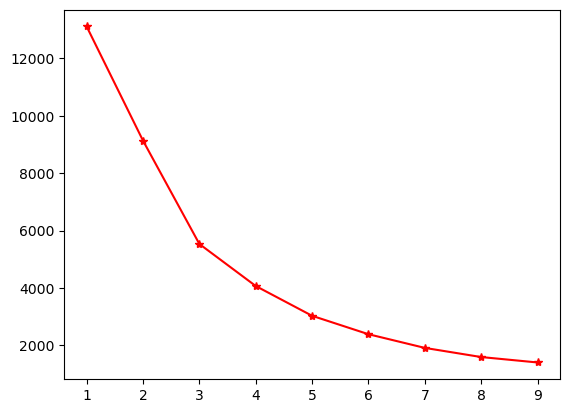

In [47]:
plt.plot(k_range, perameter, 'r-*')

In [48]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [50]:
RFM["Clusters"]=(kmeans.labels_)
RFM

,Days,freq,Monetary,Clusters
CustomerID,,,,
12346.0,326,2,0.00,1
12347.0,2,7,4310.00,0
12348.0,75,4,1797.24,0
12349.0,19,1,1757.55,0
12350.0,310,1,334.40,1
...,...,...,...,...
18280.0,278,1,180.60,1
18281.0,181,1,80.82,1
18282.0,8,3,176.60,0


In [56]:
RFM[RFM.Clusters==0].count()

Days        3237
freq        3237
Monetary    3237
Clusters    3237
dtype: int64

In [64]:
RFM['Group'] = RFM['Clusters'].map({1: 'gold', 2: 'diamond', 0: 'silver'})

In [65]:
RFM

,Days,freq,Monetary,Clusters,Group
CustomerID,,,,,
12346.0,326,2,0.00,1,gold
12347.0,2,7,4310.00,0,silver
12348.0,75,4,1797.24,0,silver
12349.0,19,1,1757.55,0,silver
12350.0,310,1,334.40,1,gold
...,...,...,...,...,...
18280.0,278,1,180.60,1,gold
18281.0,181,1,80.82,1,gold
18282.0,8,3,176.60,0,silver


In [66]:
RFM.groupby(['Group']).count()

,Days,freq,Monetary,Clusters
Group,,,,
diamond,26,26,26,26
gold,1109,1109,1109,1109
silver,3237,3237,3237,3237


In [68]:
RFM[RFM.Clusters==2]

,Days,freq,Monetary,Clusters,Group
CustomerID,,,,,
12415.0,24,26,123725.45,2,diamond
12748.0,1,224,29072.10,2,diamond
12971.0,4,89,10930.26,2,diamond
13089.0,3,118,57385.88,2,diamond
13408.0,2,81,27487.41,2,diamond
13694.0,4,60,62653.10,2,diamond
13798.0,1,63,36351.42,2,diamond
14096.0,4,34,57120.91,2,diamond
14156.0,10,66,113384.14,2,diamond
